# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform feature selection. 

👇 Run the cell below to load your preprocessed dataset.

In [2]:
import pandas as pd

data = pd.read_csv("data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarageFinish,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


# Collinearity investigation

👇 Plot a heatmap of the Pearson Correlation between the dataset columns.

<AxesSubplot:>

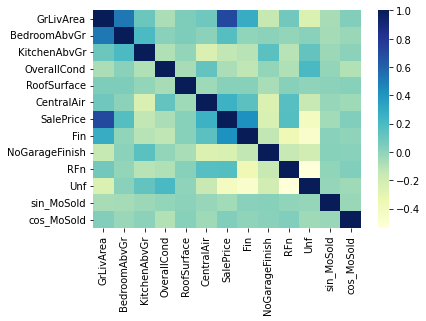

In [3]:
# YOUR CODE HERE
import seaborn as sns

# Heatmap
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

👇 Visualize the correlation between column pairs in a dataframe.

In [4]:
# YOUR CODE HERE
corr_df = corr.unstack().reset_index() 
corr_df.columns = ['feature_1','feature_2', 'correlation'] 
corr_df.sort_values(by="correlation",ascending=False, inplace=True)
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df.head()

,feature_1,feature_2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,Fin,0.419678


❓ How many pairs of features exceed a correlation of 0.9 or -0.9? Save your answer as an integer under variable name `correlated_features`

In [15]:
#correlated_features = corr_df[corr_df['correlation'] > 0.9 or [corr_df['correlation']< -0.9]].count()
correlated_features = 0

In [16]:
# YOUR CODE HERE


### ☑️ Test your code

In [58]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_correlation.py::TestCorrelation::test_correlated_features PASSED [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master


# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [24]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = data.drop(columns=['SalePrice']) 
y = data['SalePrice']
log_reg = LinearRegression()
base_model_score = cross_val_score(log_reg, X, y, cv=10)
base_model_score = base_model_score.mean()

👇 Cross validate a linear regression model. Save the score under variable name `base_model_score`.

In [26]:
# YOUR CODE HERE
base_model_score

0.6458904887289142

### ☑️ Test your code

In [57]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


# Feature Permutation

👇 Perform feature permutation, and rank features by order of importance.

In [33]:
# YOUR CODE HERE
import numpy as np
from sklearn.inspection import permutation_importance
log_model = LinearRegression().fit(X, y) 
permutation_score = permutation_importance(log_model, X, y, n_repeats=10) 
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
0,GrLivArea,1.012483
1,BedroomAbvGr,0.065762
6,Fin,0.050029
9,Unf,0.02048
2,KitchenAbvGr,0.019918
5,CentralAir,0.017243
8,RFn,0.012369
7,NoGarageFinish,0.012071
10,sin_MoSold,0.000839
3,OverallCond,0.000109


❓ Which feature is the most important? Save your answer as a `string` under variable name `best_feature`.

In [36]:
# YOUR CODE HERE
best_feature = 'GrLivArea'
best_feature

'GrLivArea'

### ☑️ Test your code

In [56]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master


# Reduced complexity model

👇 Drop the the weak features and cross-validate a new model. You should aim to maintain a score close to the previous one. Save the score under variable name `simplified_model_score`.

In [48]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

data.drop(columns=['OverallCond'], inplace=True)
data.drop(columns=['RoofSurface'], inplace=True)
data.drop(columns=['cos_MoSold'], inplace=True)


KeyError: "['OverallCond'] not found in axis"

In [52]:
X_simple = data.drop(columns=['SalePrice']) 
y_simple = data['SalePrice']

log_reg = LinearRegression() 
scores = cross_val_score(log_reg, X_simple, y_simple, cv=10) 
simplified_model_score = scores.mean()
simplified_model_score

0.647119057938771

### ☑️ Test your code

In [55]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master


# 🏁